# Skip conncetion

* 170216 masahiro rikiso: init commit
* 170616 masahiro rikiso: fix API to keras>=2.0.0

---

you can add vector values by using **keras.layers.merge()**

* mode='sum' (argument) can be used only if summed vector's dimentions are same.

In [2]:
from keras.optimizers import Adam
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Input, merge

Because default learning rate of Adam optimizer is too large in many cases, change the value!

* learning rate is the most important hyper-paremeter in my personal experience.

In [3]:
lr = 0.0001

In [4]:
nb_dim = (512,)
nb_cat = 4

In [5]:
x0 = Input(shape=nb_dim, name="input")
x1 = Dense(512)(x0)
x1 = Activation("elu")(x1)
x1 = Dropout(0.5)(x1)
x1 = merge([x0, x1], mode="sum")

x2 = Dense(512)(x1)
x2 = Activation("elu")(x2)
x2 = Dropout(0.5)(x2)
x2 = merge([x1, x2], mode="sum")

x3 = Dense(512)(x2)
x3 = Activation("elu")(x3)
x3 = Dropout(0.5)(x3)
x3 = merge([x2, x3], mode="sum")

x4 = Dense(nb_cat+1)(x3)
x4 = Activation('softmax')(x4)

model = Model(input=[x0], output=[x4], name="generator_upsampling")
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])

/Users/riki/.pyenv/versions/ML-2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  """
/Users/riki/.pyenv/versions/ML-2.7.13/lib/python2.7/site-packages/keras/legacy/layers.py:456: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/Users/riki/.pyenv/versions/ML-2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  # Remove the CWD from sys.path while we load stuff.
/Users/riki/.pyenv/versions/ML-2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:15: UserWarning: The `merge` function is deprecated and will be removed after 08/2

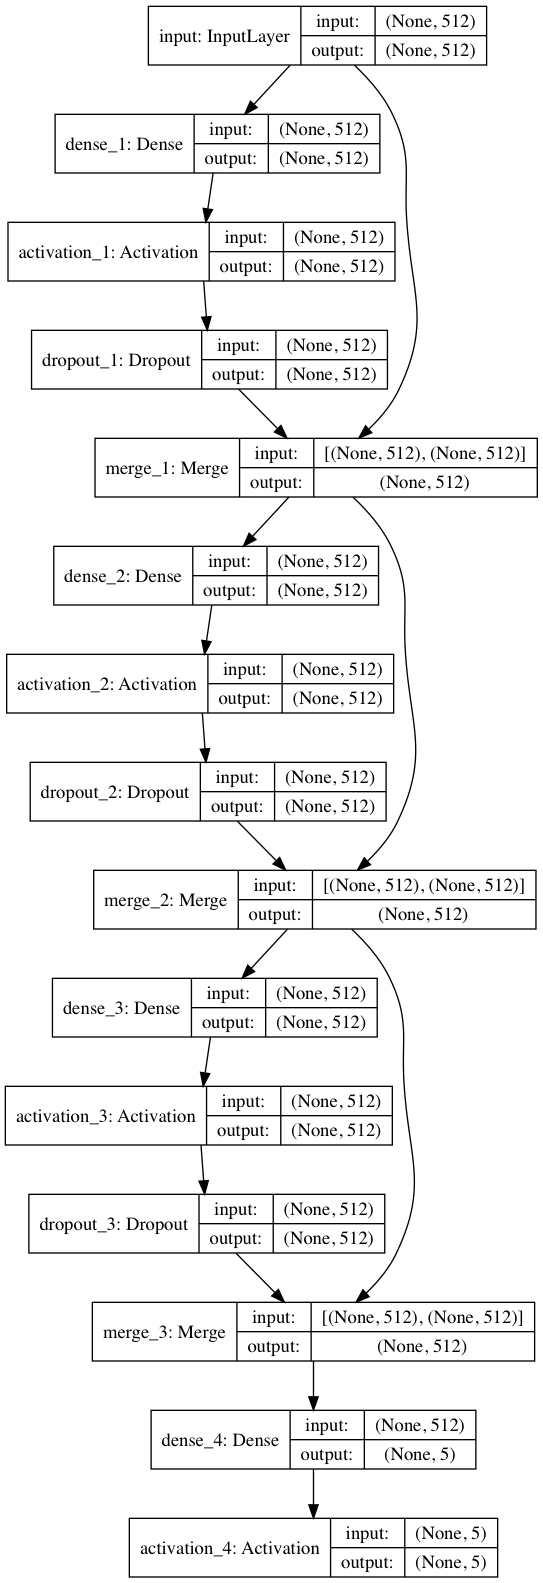

In [9]:
from keras.utils import plot_model
plot_model(model, to_file='model/model_with_skip_conn.png',
           show_shapes=True, show_layer_names=True)

from IPython.display import Image
Image("model/model_with_skip_conn.png", width=350)